<a href="https://colab.research.google.com/github/lauree77/all_deep_se1/blob/main/tensorflow_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

In [ ]:
len(train_labels)

In [7]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]]) 
plt.show()


In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [13]:
model.compile(optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4937 - accuracy: 0.8277
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3755 - accuracy: 0.8665
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3357 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3121 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2957 - accuracy: 0.8905


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도 : ', test_acc)

313/313 - 0s - loss: 0.3575 - accuracy: 0.8715

테스트 정확도 :  0.8715000152587891


In [16]:
predictions = model.predict(test_images)

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
def plot_value_array(i, predictions_array, true_label):    
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

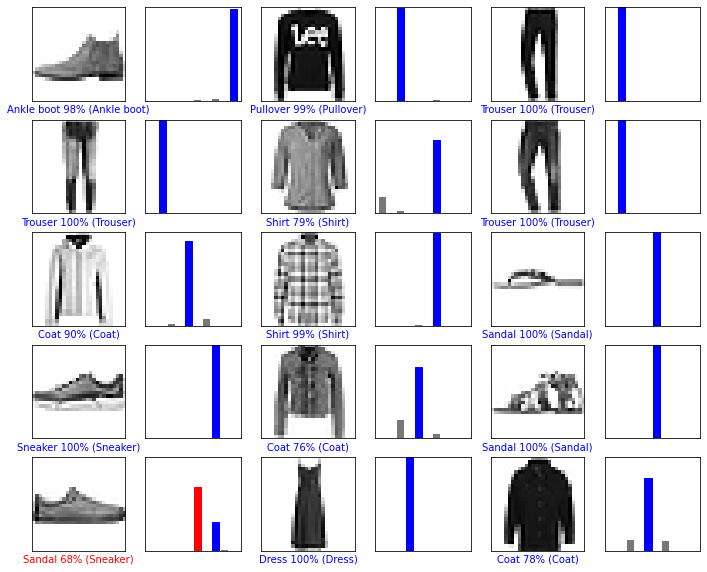

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:

img = (np.expand_dims(test_images[0], 0))
print(img.shape)

In [29]:
predictions_single = model.predict(img)
print(predictions_single)

[[7.84918484e-06 1.40998155e-08 3.60771651e-07 1.18578058e-07
  1.64400660e-06 8.18562135e-03 4.85866913e-05 1.58202909e-02
  3.87500622e-05 9.75896835e-01]]


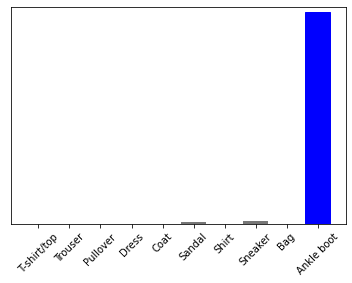

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

9